In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('accelerometer (1).csv')
print(df.head())


   wconfid  pctid      x      y      z
0        1     20  1.004  0.090 -0.125
1        1     20  1.004 -0.043 -0.125
2        1     20  0.969  0.090 -0.121
3        1     20  0.973 -0.012 -0.137
4        1     20  1.000 -0.016 -0.121


In [3]:
df

,wconfid,pctid,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121
3,1,20,0.973,-0.012,-0.137
4,1,20,1.000,-0.016,-0.121
...,...,...,...,...,...
152995,3,100,1.051,0.090,-0.262
152996,3,100,0.918,0.039,-0.129
152997,3,100,1.156,-0.094,-0.227
152998,3,100,0.934,0.203,-0.172


In [4]:
print(df.shape)
print(df.describe())

(153000, 5)
             wconfid          pctid              x              y  \
count  153000.000000  153000.000000  153000.000000  153000.000000   
mean        2.000000      60.000000       0.995622       0.005351   
std         0.816499      24.494977       0.773958       0.742602   
min         1.000000      20.000000      -8.000000      -8.000000   
25%         1.000000      40.000000       0.945000      -0.078000   
50%         2.000000      60.000000       0.992000       0.008000   
75%         3.000000      80.000000       1.039000       0.105000   
max         3.000000     100.000000       7.996000       7.996000   

                   z  
count  153000.000000  
mean       -0.117769  
std         0.517008  
min        -5.867000  
25%        -0.172000  
50%        -0.125000  
75%        -0.066000  
max         6.086000  


In [5]:
df.head()

,wconfid,pctid,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121
3,1,20,0.973,-0.012,-0.137
4,1,20,1.000,-0.016,-0.121


In [5]:
df.head()

,wconfid,pctid,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121
3,1,20,0.973,-0.012,-0.137
4,1,20,1.000,-0.016,-0.121


In [6]:
df_cleaned = df.drop_duplicates()

In [11]:
df.dropna(inplace=True)

In [12]:
df.head()

,wconfid,pctid,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121
3,1,20,0.973,-0.012,-0.137
4,1,20,1.000,-0.016,-0.121


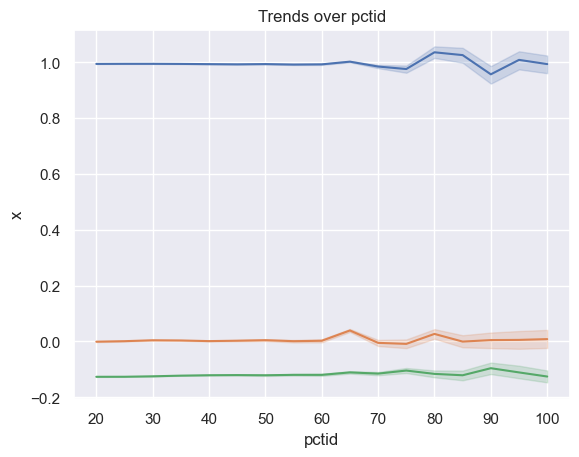

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
sns.lineplot(data=df, x="pctid", y="x")
sns.lineplot(data=df, x="pctid", y="y")
sns.lineplot(data=df, x="pctid", y="z")

plt.xlabel('pctid')
plt.title('Trends over pctid')
plt.show()

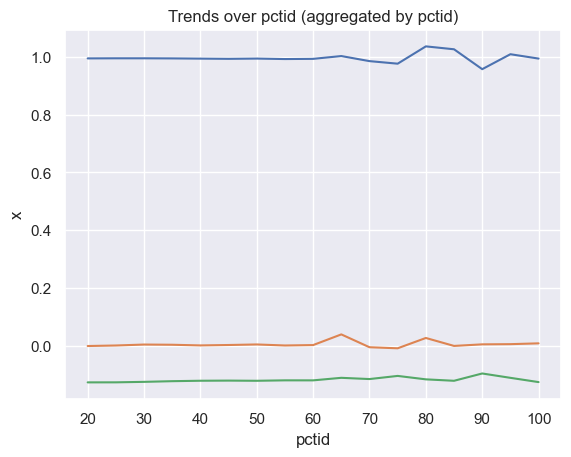

In [14]:
df_pct = df.groupby('pctid').agg({'x':'mean', 'y':'mean', 'z':'mean'})

sns.set()
sns.lineplot(data=df_pct, x=df_pct.index, y="x")
sns.lineplot(data=df_pct, x=df_pct.index, y="y") 
sns.lineplot(data=df_pct, x=df_pct.index, y="z")

plt.xlabel('pctid') 
plt.title('Trends over pctid (aggregated by pctid)')
plt.show()

C:\Users\PAMPA\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


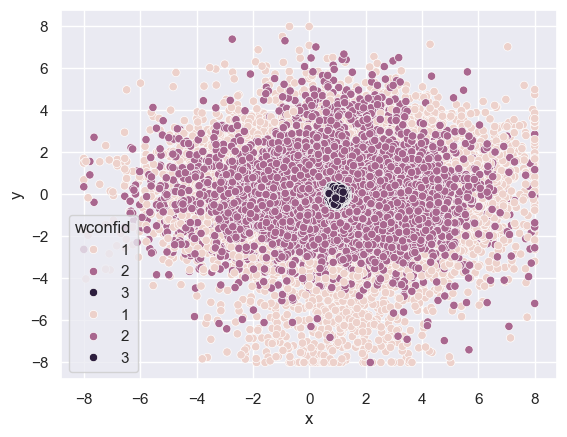

In [15]:
sns.set()
sns.scatterplot(data=df, x="x", y="y", hue="wconfid")
sns.scatterplot(data=df, x="x", y="z", hue="wconfid")
plt.legend(title='wconfid')
plt.show()

In [16]:
df_group = df.groupby('wconfid').agg({'x':'mean', 'y':'mean', 'z':'mean'}).reset_index()
print(df_group)
print(df[['x','y','z']].corr())

   wconfid         x         y         z
0        1  1.000087 -0.003925 -0.122148
1        2  0.998190  0.014133 -0.111833
2        3  0.988589  0.005845 -0.119326
          x         y         z
x  1.000000  0.021137 -0.091164
y  0.021137  1.000000 -0.027716
z -0.091164 -0.027716  1.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153000 entries, 0 to 152999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   wconfid  153000 non-null  int64  
 1   pctid    153000 non-null  int64  
 2   x        153000 non-null  float64
 3   y        153000 non-null  float64
 4   z        153000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 5.8 MB


In [35]:
X = df.drop('wconfid', axis=1)  # Replace 'target_column_name' with the actual column name of your target variable
y = df['wconfid']